In [4]:
import sims
import numpy as np
import msprime
import pandas as pd

import useful
import seaborn
import matplotlib
from matplotlib import pyplot as plt
from importlib import reload


In [9]:
# Generation time, mutation rate and recomination rate
RR = 1e-8
MU = 1.29e-8 
GEN_time = 29.0 

# Split Times
T_NEAND_migration = 55000 #time of Neanderthal migration into Out_of_africa population
T_NEAND_AMH = 550000 # split time between AMH and Neanderthal
T_OOF_AF = 65700 # Out_of_Africa migration time
T_ND_SPLIT = 300000
T_Split_EU_Sample = 50000
T_NEAND_samples = 35000
T_SECOND_NEAND_MIGRATION = 40000

# Effective population size
N_ANC = 18500 # N_e of common  AMH and NEanderthal population 
N_ND = 3400 # N_e of Neanderthal
N_AMH = 23000 # N_e of AMH
N_OOF = 1861 # N_e of Out_of_Africa population
N_AF = 27600 # N_e of Africans
N_EU = 13377 #N_e of Europeans
N_Sample = 10000

N_EU_bottleneck = 1080
N_EU_growth = 1450
T_EU_growth = 31900
gr_rate = 0.00202
Portion_admix = 0.05
Portion_admix2 = 0.05

len_sequence = 10e7 # DNA sequence length

n = 300 # number of generated   AF samples
n_neand = 6 #number of generated Neanderthals

rand_sd =1234 #random seed

T = np.array([T_NEAND_migration, T_NEAND_AMH, T_OOF_AF, T_SECOND_NEAND_MIGRATION, T_ND_SPLIT, T_Split_EU_Sample])/GEN_time
print(T)


[ 1896.55172414 18965.51724138  2265.51724138  1379.31034483
 10344.82758621  1724.13793103]


In [10]:
N_ND = 3400 # N_e of Neanderthal
N_e = np.array([N_ANC, N_ND, N_AMH, N_OOF, N_AF, N_EU, N_Sample])

n_eu=2

ts3400 =sims.history_archaic(GEN_time, len_sequence, RR, MU, N_e, T,  n, rand_sd, n_neand,  
                         T_NEAND_samples/GEN_time, n_eu, N_EU_growth, 
                         T_EU_growth/GEN_time, N_EU_bottleneck, gr_rate, Portion_admix, Portion_admix2)


DemographyDebugger
╠════════════════════════════════════╗
║ Epoch[0]: [0, 1.1e+03) generations ║
╠════════════════════════════════════╝
╟    Populations (total=11 active=5)
║    ┌───────────────────────────────────────────────────────────────────────────────────────────┐
║    │                │     start│       end│growth_rate  │ AF │ EU │ ND1 │ ND2 │ SAMPLE_admixed │
║    ├───────────────────────────────────────────────────────────────────────────────────────────┤
║    │              AF│   27600.0│   27600.0│ 0           │ 0  │ 0  │  0  │  0  │       0        │
║    │              EU│   13377.0│    1450.0│ 0.00202     │ 0  │ 0  │  0  │  0  │       0        │
║    │             ND1│    3400.0│    3400.0│ 0           │ 0  │ 0  │  0  │  0  │       0        │
║    │             ND2│    3400.0│    3400.0│ 0           │ 0  │ 0  │  0  │  0  │       0        │
║    │  SAMPLE_admixed│   10000.0│   10000.0│ 0           │ 0  │ 0  │  0  │  0  │       0        │
║    └─────────────────────────────

In [11]:
ND_true_tracts = [[],[]]
for idx in range(0, n_eu): 
#    print( sims.get_migrating_tracts_ind(ts3400, 'NEAND', idx, T[0]))
    nd1=sims.get_migrating_tracts_ind(ts3400, 'ND1', idx, T[0]) 
    nd2=sims.get_migrating_tracts_ind(ts3400, 'ND2', idx, T[3])

    ND_true_tracts[0].append( nd1 )
    ND_true_tracts[1].append( nd2 )

In [12]:
ND_true_tracts

[[[[6533369.0, 6664831.0],
   [9845242.0, 9856225.0],
   [10303844.0, 10319973.0],
   [10613509.0, 10618039.0],
   [10920575.0, 11054020.0],
   [11237983.0, 11321633.0],
   [12345157.0, 12345811.0],
   [28835597.0, 28880400.0],
   [29005781.0, 29053431.0],
   [48523466.0, 48527591.0],
   [48727420.0, 48740591.0],
   [49098457.0, 49144723.0],
   [49174552.0, 49176143.0],
   [49258864.0, 49364567.0],
   [49530838.0, 49733890.0],
   [50215058.0, 50302676.0],
   [50467890.0, 50565981.0],
   [50632657.0, 50710569.0],
   [50784138.0, 50846029.0],
   [52225401.0, 52229901.0],
   [54823579.0, 54940002.0],
   [55269415.0, 55289771.0],
   [56959305.0, 57027640.0],
   [57594008.0, 57712200.0],
   [57743528.0, 57760835.0],
   [57978405.0, 58004342.0],
   [58019527.0, 58075112.0],
   [59053471.0, 59174642.0],
   [59226217.0, 59327057.0],
   [59328621.0, 59443963.0],
   [59825205.0, 59828726.0],
   [60113411.0, 60158437.0],
   [60429266.0, 60457797.0],
   [60513262.0, 60581972.0],
   [61476681.0, 61

In [23]:
# N_ref_pop=300
# N=3


# n_neand_hapl=2



# with open('make.obs.sims.txt', 'w') as f:
#     f.write('#POSITIONS\t#REF\t#ALT\tANCESTRAL\t#OUTGROUP\t#ARCHAIC\t#OBSERVATIONS\n')
#     for v in ts3400.variants():
#         outgroup= str(list(set(v.genotypes[n_eu :( n_eu+N_ref_pop)]))).replace('[','').replace(']','').replace(' ','')
#         archaic1= str(list(set(v.genotypes[n_eu+n :( n_eu+n+n_neand_hapl)]))).replace('[','').replace(']','').replace(' ','')
#         archaic2=str(list(set(v.genotypes[n_eu+n+n_neand_hapl :( n_eu+n+2*n_neand_hapl)]))).replace('[','').replace(']','').replace(' ','')

#         obs=''
#         for i in v.genotypes[0 :n_eu]:
#             obs+=str(i)+' '


#         f.write(str(int(v.site.position))+'\t'+str(v.alleles[0])+'\t'+
#                 str(v.alleles[1]) + '\t'+ str(0)+'\t' + outgroup+'\t'+archaic1+'\t'+archaic2+'\t'+str(obs)+'\n')

N=3


n_neand_hapl=2
for N_ref_pop in range(50, 301, 50):
    out_fname = f"make.obs.sims_{N_ref_pop}.txt"
    with open(out_fname, 'w') as f:
        f.write('#POSITIONS\t#REF\t#ALT\tANCESTRAL\t#OUTGROUP\t#ARCHAIC\t#OBSERVATIONS\n')
        for v in ts3400.variants():
            outgroup = str(list(set(v.genotypes[n_eu :( n_eu + N_ref_pop)]))).replace('[','').replace(']','').replace(' ','')
#             archaic1 = str(list(set(v.genotypes[n_eu + N_ref_pop :( n_eu + N_ref_pop + n_neand_hapl)]))).replace('[','').replace(']','').replace(' ','')
            archaic1 = str(list(set(v.genotypes[n_eu+n :( n_eu+n+n_neand_hapl)]))).replace('[','').replace(']','').replace(' ','')
            archaic2 = str(list(set(v.genotypes[ n_eu+n+n_neand_hapl :( n_eu+n+2*n_neand_hapl)]))).replace('[','').replace(']','').replace(' ','')

            obs = ''
            for i in v.genotypes[0 : n_eu]:
                obs += str(i) + ' '
            f.write(str(int(v.site.position))+'\t'+str(v.alleles[0])+'\t'+
                str(v.alleles[1]) + '\t'+ str(0)+'\t' + outgroup+'\t'+archaic1+'\t'+archaic2+'\t'+str(obs)+'\n')
    print(f"Wrote {out_fname} for N_ref_pop={N_ref_pop}")



Wrote make.obs.sims_50.txt for N_ref_pop=50
Wrote make.obs.sims_100.txt for N_ref_pop=100
Wrote make.obs.sims_150.txt for N_ref_pop=150
Wrote make.obs.sims_200.txt for N_ref_pop=200
Wrote make.obs.sims_250.txt for N_ref_pop=250
Wrote make.obs.sims_300.txt for N_ref_pop=300


In [24]:
L=1000

#create bed file
with open('test.bed','w') as f:
    f.write('1\t0\t'+str(int(len_sequence)-1)+'\n')



f_bed='test.bed'
domain=useful.read_bed(f_bed)

n_windows=(domain[-1][1]-domain[0][0])//L + 1
windows_cover=np.ones(n_windows)*0.999

#create archaic covering file. 
CHR=1
with open('arch.covering.chr'+str(CHR)+'.txt','w') as f:
    for j in windows_cover:
        f.write(str(j)+'\n')

print(n_eu)
#create file with sample's names
with open('samples.txt','w') as f:
    for i in range(int(n_eu/2)):
        f.write('eu'+str(i)+'\n')

2


In [15]:
! python3 dai.seg.py --obs_samples samples.txt --bed test.bed   --HMM_par par.file.txt --EM no --prepared_file make.obs.sims.txt --o out --arch_cover arch.covering.chr1.txt --cut_off 0.9

/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [25]:
import subprocess

for n in [50, 100, 150, 200, 250, 300]:
    cmd = [
        "python3", "dai.seg.py",
        "--obs_samples", "samples.txt",
        "--bed", "test.bed",
        "--HMM_par", "par.file.txt",
        "--EM", "no",
        "--prepared_file", f"make.obs.sims_{n}.txt",
        "--o", f"out_{n}",
        "--arch_cover", "arch.covering.chr1.txt",
        "--cut_off", "0.9"
    ]
    subprocess.run(cmd)

/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/maxim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/maxim/opt/a

In [26]:
reload(useful)
# HMM_tracts, REAL_tracts=[], []
# HMM_ND1, HMM_ND2=useful.read_out('out.archaic.ND1.txt'), useful.read_out('out.archaic.ND2.txt')
# for j in range(len(HMM_ND1)):

#     nd_hmm=HMM_ND1[j]+HMM_ND2[j]
#     if [] in nd_hmm:
#         nd_hmm.remove([])
#     modern_hmm=useful.tracts_eu(nd_hmm, len_sequence)
#     HMM_tracts.append([modern_hmm, HMM_ND1[j], HMM_ND2[j]])
    
    
#     nd_real=ND_true_tracts[0][j]+ND_true_tracts[1][j]    
#     if [] in nd_real:
#         nd_real.remove([])
        
#     modern_real=useful.tracts_eu(nd_real, len_sequence)
#     REAL_tracts.append([modern_real, ND_true_tracts[0][j], ND_true_tracts[1][j]])    



# useful.confusion_mtrx(REAL_tracts[0], HMM_tracts[0])   
# df = useful.df_result(  REAL_tracts, HMM_tracts,1, L, N_ref_pop, n_eu, N)

results = []

for N_ref_pop in range(50, 301, 50):
    HMM_tracts, REAL_tracts=[], []
    
    file_ND1 = f'out_{N_ref_pop}.archaic.ND1.txt'
    file_ND2 = f'out_{N_ref_pop}.archaic.ND2.txt'

    HMM_ND1 = useful.read_out(file_ND1)
    HMM_ND2 = useful.read_out(file_ND2)
    
    for j in range(len(HMM_ND1)):
        
        nd_hmm=HMM_ND1[j]+HMM_ND2[j]
        if [] in nd_hmm:
            nd_hmm.remove([])
        modern_hmm = useful.tracts_eu(nd_hmm, len_sequence)
        HMM_tracts.append([modern_hmm, HMM_ND1[j], HMM_ND2[j]])

        
        nd_real=ND_true_tracts[0][j]+ND_true_tracts[1][j]
        if [] in nd_real:
            nd_real.remove([])
            
        modern_real=useful.tracts_eu(nd_real, len_sequence)
        REAL_tracts.append([modern_real, ND_true_tracts[0][j], ND_true_tracts[1][j]])
    
    df = useful.df_result(REAL_tracts, HMM_tracts, 1, L, N_ref_pop, n_eu, N)
    results.append(df)
big_df = pd.concat(results, ignore_index=True)

In [33]:
big_df

,State,Value,Score,n_eu,n_neand,L,n_ref_pop
0,0,0.916726,precision,0,1,1000,50
1,0,0.985331,recall,0,1,1000,50
2,1,0.500000,precision,0,1,1000,50
3,1,0.385019,recall,0,1,1000,50
4,2,0.060817,precision,0,1,1000,50
...,...,...,...,...,...,...,...
67,0,0.984767,recall,1,1,1000,300
68,1,0.433408,precision,1,1,1000,300
69,1,0.418454,recall,1,1,1000,300
70,2,0.106785,precision,1,1,1000,300


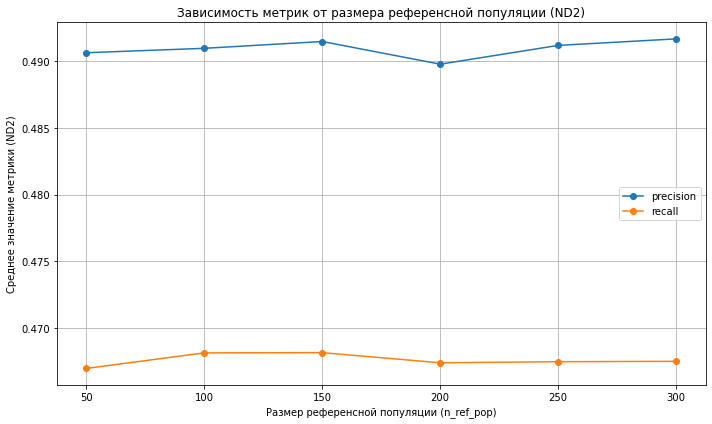

In [44]:
big_df['Value'] = pd.to_numeric(big_df['Value'], errors='coerce')
grouped = big_df.groupby(['n_ref_pop', 'Score'])['Value'].mean().unstack()

plt.figure(figsize=(10, 6))
for score_type in grouped.columns:
    x = grouped.index.values
    y = grouped[score_type].values
    plt.plot(x, y, marker='o', label=score_type)

plt.xlabel('Размер референсной популяции (n_ref_pop)')
plt.ylabel('Среднее значение метрики (ND2)')
plt.title('Зависимость метрик от размера референсной популяции (ND2)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('3.png')
plt.show()

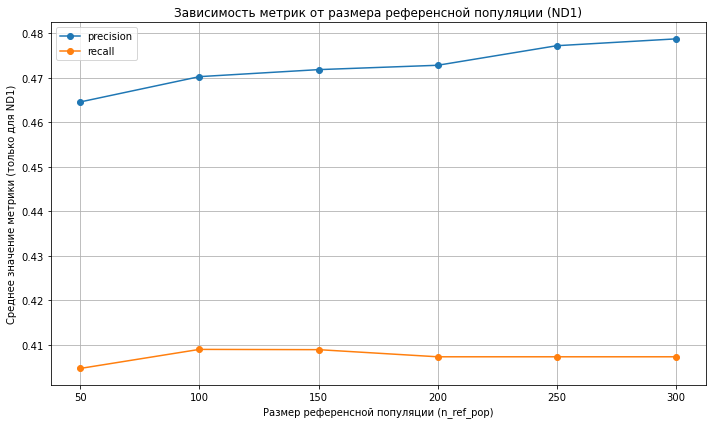

In [43]:
big_df['Value'] = pd.to_numeric(big_df['Value'], errors='coerce')

nd1_df = big_df[big_df['State'] == 1]

grouped_nd1 = nd1_df.groupby(['n_ref_pop', 'Score'])['Value'].mean().unstack()

plt.figure(figsize=(10, 6))
for score_type in grouped_nd1.columns:
    x = grouped_nd1.index.values
    y = grouped_nd1[score_type].values
    plt.plot(x, y, marker='o', label=score_type)

plt.xlabel('Размер референсной популяции (n_ref_pop)')
plt.ylabel('Среднее значение метрики для (ND2)')
plt.title('Зависимость метрик от размера референсной популяции (ND1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ND1_metrics.png')
plt.show()

In [32]:
def merge(intervals):
    new_intervals = []
    
    for element in intervals:
        if isinstance(element, list) and len(element) == 2 and isinstance(element[0], (int, float)):
            new_intervals.append(element)
        elif isinstance(element, list):
            new_intervals.extend(merge(element))
    new_intervals.sort()
    merged = []
    for start, end in new_intervals:
        if not merged or merged[-1][1] < start:  
            merged.append([start, end])
        else:
            merged[-1][1] = max(merged[-1][1], end)

    return merged

def inter_len(intervals):
    return sum(end - start for start, end in intervals)

def inter_diff(a, b):
    return subtract(union(a, b), intersect(a, b))

def intersect(a, b):
    i, j = 0, 0
    res = []
    while i < len(a) and j < len(b):
        startA, endA = a[i]
        startB, endB = b[j]
        if endA < startB:
            i += 1
        elif endB < startA:
            j += 1
        else:
            left = max(startA, startB)
            right = min(endA, endB)
            if left < right:
                res.append([left, right])
            if endA < endB:
                i += 1
            else:
                j += 1
    return res

def union(a, b):
    combined = merge(a + b)
    return combined

def subtract(a, b):
    res = []
    i, j = 0, 0
    while i < len(a):
        startA, endA = a[i]
        if j >= len(b):
            res.append([startA, endA])
            i += 1
            continue

        startB, endB = b[j]
        if endA < startB:
            res.append([startA, endA])
            i += 1
        elif endB < startA:
            j += 1
        else:
            if startA < startB:
                res.append([startA, startB])
            if endA <= endB:
                i += 1
            else:
                a[i] = [endB, endA]
                j += 1
    return res

def one_dim_intervals(inter):
    result = []
    for x in inter:
        if isinstance(x, list) and len(x) == 2 and isinstance(x[0], (int, float)):
            result.append(x)
        elif isinstance(x, list):
            result.extend(one_dim_intervals(x))
    return result

# true_intervals = ND_true_tracts[0]
# pred_intervals = HMM_ND1

# true_flat = one_dim_intervals(true_intervals)
# pred_flat = one_dim_intervals(pred_intervals)
# true_merged = merge(true_flat)
# pred_merged = merge(pred_flat)

# mismatch_intervals = inter_diff(true_merged, pred_merged)
# mismatch_length = inter_len(mismatch_intervals)

# sum_true = inter_len(true_merged)
# if sum_true > 0:
#     mismatch_rate = mismatch_length / sum_true
    
# print("Число отличий:", mismatch_length)
# print("Общая длина:", sum_true)
# print("Отличий на единицу длины:", mismatch_rate)


mismatch_rates = []

for N_ref_pop in range(50, 301, 50):
    file_ND1 = f'out_{N_ref_pop}.archaic.ND1.txt'
    HMM_ND1 = useful.read_out(file_ND1)
    
    true_intervals = ND_true_tracts[0]
    pred_intervals = HMM_ND1

    true_flat = one_dim_intervals(true_intervals)
    pred_flat = one_dim_intervals(pred_intervals)
    true_merged = merge(true_flat)
    pred_merged = merge(pred_flat)

    mismatch_intervals = inter_diff(true_merged, pred_merged)
    mismatch_length = inter_len(mismatch_intervals)
    
    sum_true = inter_len(true_merged)
    if sum_true > 0:
        mismatch_rate = mismatch_length / sum_true
    else:
        mismatch_rate = 0.0

    mismatch_rates.append((N_ref_pop, mismatch_rate))
    
    print(f"N_ref_pop = {N_ref_pop}")
    print("Число отличий:", mismatch_length)
    print("Общая длина:", sum_true)
    print("Отличий на единицу длины:", mismatch_rate)
    print("-" * 40)


N_ref_pop = 50
Число отличий: 6514920.0
Общая длина: 8092481.0
Отличий на единицу длины: 0.805058423986414
----------------------------------------
N_ref_pop = 100
Число отличий: 6445584.0
Общая длина: 8092481.0
Отличий на единицу длины: 0.7964904705985717
----------------------------------------
N_ref_pop = 150
Число отличий: 6434176.0
Общая длина: 8092481.0
Отличий на единицу длины: 0.795080766948974
----------------------------------------
N_ref_pop = 200
Число отличий: 6438177.0
Общая длина: 8092481.0
Отличий на единицу длины: 0.7955751765126171
----------------------------------------
N_ref_pop = 250
Число отличий: 6403180.0
Общая длина: 8092481.0
Отличий на единицу длины: 0.791250544795842
----------------------------------------
N_ref_pop = 300
Число отличий: 6386180.0
Общая длина: 8092481.0
Отличий на единицу длины: 0.7891498293292255
----------------------------------------
